# Identification of Medicinal Plant in Ardabil Using Deep learning

## jafar Abdollahi

For the protection of natural resources, plants are of central importance. Identification of plant species offers important knowledge on the categorization and properties of plants. Many plants are richly having medicinal ingredients and contain medicinal active ingredients. The identification of these plants is immediately necessary because of the need for mass production. The manual identification of medicinal plants takes time and the assistance of plant identification experts is necessary. To solve this problem, it is essential for human beings to automatically recognize and classify medicinal plants. Among AI technologies, deep learning has demonstrated strong performance in many automated image-recognition applications. The aim of this study was to develop and test a deep learning system capable of Identification of Medicinal Plant.

## Mount drive for dataset

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import appropriate libraries

In [ ]:
import os
from shutil import copy2
import csv


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

# Set path to the data set located inside google drive

In [ ]:
data_root = ("/content/drive/MyDrive/plant/Dataset")

In [ ]:
# dataset_path = '/content/drive/MyDrive/plant/Dataset'
import glob
dataset_path = '/content/drive/MyDrive/plant/Dataset'
image_paths=[image_path for image_path in glob.glob(dataset_path+'/*/*')]
image_categories=[os.path.basename(os.path.dirname(image_path)) for image_path in image_paths]
filenames=[os.path.basename(image_path) for image_path in image_paths]

In [ ]:
import pandas as pd

dataset_df = pd.DataFrame({'image_paths':image_paths,'filename':filenames,'image_category':image_categories})
dataset_df.sort_values('image_category',inplace=True)
dataset_df.tail(3)

,image_paths,filename,image_category
1686,/content/drive/MyDrive/plant/Dataset/trigonell...,images (7).jpg,trigonella foenum-graecum
1687,/content/drive/MyDrive/plant/Dataset/trigonell...,download.jpg,trigonella foenum-graecum
1680,/content/drive/MyDrive/plant/Dataset/trigonell...,images (3).jpg,trigonella foenum-graecum


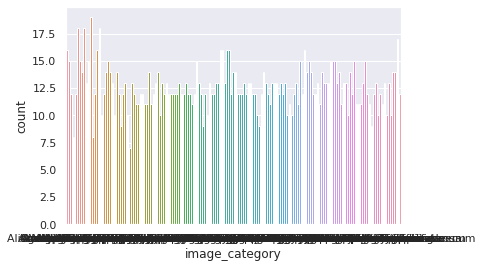

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="image_category", data=dataset_df)

# Rescale images and split data into training and validation sets

In [ ]:
IMAGE_SHAPE = (224, 224)                                         
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)


Found 327 images belonging to 155 classes.
Found 1628 images belonging to 155 classes.


# visualize the data

In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 155))

# The image labels are mapped onto indices and 
# the labels written to a text file

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Acacia senegal': 0, 'Achille millefolium': 1, 'Actaea racemosa': 2, 'Ageratina altissima': 3, 'Alcea rosea': 4, 'Alisma plantago-aquatica': 5, 'Allium sativum': 6, 'Aloe vera': 7, 'Althaea officinalis': 8, 'Amorphophallus konjac': 9, 'Anemone hepatica': 10, 'Angelica archangelica': 11, 'Angelica sinensis': 12, 'Apium graveolens': 13, 'Arctium lappa': 14, 'Arnica montana': 15, 'Astragalus propinquus': 16, 'Atropa belladonna': 17, 'Azadirachta indica': 18, 'Bellis perennis': 19, 'Berberis vulgaris': 20, 'Borago officinalis': 21, 'Broussonetia kurzii': 22, 'Calendula officinalis': 23, 'Capsicum annuum': 24, 'Capsicum frutescens': 25, 'Carica papaya': 26, 'Carica papaya-2': 27, 'Catha edulis': 28, 'Cayaponia espelina': 29, 'Centaurea cyanus': 30, 'Chrysopogon zizanioides': 31, 'Cinchona spec': 32, 'Cissampelos pareira': 33, 'Citrus limon': 34, 'Citrus trifoliata': 35, 'Citrus x aurantium': 36, 'Cnicus benedictus': 37, 'Crataegus monogyna and Crataegus laevigata': 38, 'Curcuma longa': 39,

In [ ]:
!cat labels.txt

Acacia senegal
Achille millefolium
Actaea racemosa
Ageratina altissima
Alcea rosea
Alisma plantago-aquatica
Allium sativum
Aloe vera
Althaea officinalis
Amorphophallus konjac
Anemone hepatica
Angelica archangelica
Angelica sinensis
Apium graveolens
Arctium lappa
Arnica montana
Astragalus propinquus
Atropa belladonna
Azadirachta indica
Bellis perennis
Berberis vulgaris
Borago officinalis
Broussonetia kurzii
Calendula officinalis
Capsicum annuum
Capsicum frutescens
Carica papaya
Carica papaya-2
Catha edulis
Cayaponia espelina
Centaurea cyanus
Chrysopogon zizanioides
Cinchona spec
Cissampelos pareira
Citrus limon
Citrus trifoliata
Citrus x aurantium
Cnicus benedictus
Crataegus monogyna and Crataegus laevigata
Curcuma longa
Cypripedium parviflorum
Digitalis lanata
Echinacea purpurea
Equisetum arvense
Eriodictyon crassifolium
Eschscholzia californica
Eucalyptus globulus
Euonymus atropurpureus
Euphorbia hirta
Euphorbia oleracea
Ferula assa-foetida
Frangula alnus
Fumaria officinalis
Galanthus

# Load a pretrained model from tensorflow hub

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 155)               198555    
Total params: 2,456,539
Trainable params: 198,555
Non-trainable params: 2,257,984
_________________________________________________________________


# Choose an Optimizer and compile the model

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['acc'])

# Set number of epocs and other parameters and fit the model

## Training the model

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=50,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/50
51/51 [==============================] - 51s 390ms/step - loss: 4.9533 - acc: 0.0627 - val_loss: 3.2565 - val_acc: 0.3884
Epoch 2/50
51/51 [==============================] - 17s 341ms/step - loss: 2.4474 - acc: 0.4625 - val_loss: 2.2030 - val_acc: 0.5474
Epoch 3/50
51/51 [==============================] - 17s 335ms/step - loss: 1.4615 - acc: 0.7009 - val_loss: 1.8107 - val_acc: 0.6300
Epoch 4/50
51/51 [==============================] - 17s 344ms/step - loss: 0.9713 - acc: 0.8200 - val_loss: 1.6075 - val_acc: 0.6391
Epoch 5/50
51/51 [==============================] - 17s 343ms/step - loss: 0.6966 - acc: 0.8857 - val_loss: 1.4904 - val_acc: 0.6636
Epoch 6/50
51/51 [==============================] - 17s 335ms/step - loss: 0.5193 - acc: 0.9318 - val_loss: 1.4024 - val_acc: 0.6789
Epoch 7/50
51/51 [==============================] - 17s 336ms/step - loss: 0.4117 - acc: 0.9380 - val_loss: 1.3604 - val_acc: 0.6728
Epoch 8/50
51/51 [==============================] - 17s 337ms/step - 

# Plots of training and validation accuracy

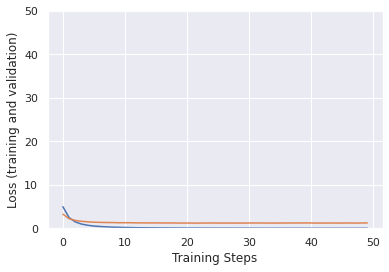

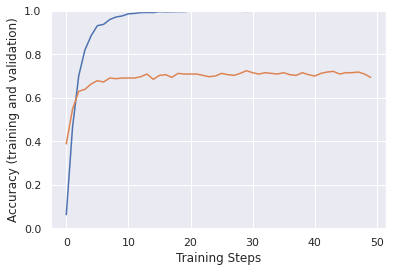

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Acacia Senegal' 'Achille Millefolium' 'Actaea Racemosa'
 'Ageratina Altissima' 'Alcea Rosea' 'Alisma Plantago-Aquatica'
 'Allium Sativum' 'Aloe Vera' 'Althaea Officinalis'
 'Amorphophallus Konjac' 'Anemone Hepatica' 'Angelica Archangelica'
 'Angelica Sinensis' 'Apium Graveolens' 'Arctium Lappa' 'Arnica Montana'
 'Astragalus Propinquus' 'Atropa Belladonna' 'Azadirachta Indica'
 'Bellis Perennis' 'Berberis Vulgaris' 'Borago Officinalis'
 'Broussonetia Kurzii' 'Calendula Officinalis' 'Capsicum Annuum'
 'Capsicum Frutescens' 'Carica Papaya' 'Carica Papaya-2' 'Catha Edulis'
 'Cayaponia Espelina' 'Centaurea Cyanus' 'Chrysopogon Zizanioides'
 'Cinchona Spec' 'Cissampelos Pareira' 'Citrus Limon' 'Citrus Trifoliata'
 'Citrus X Aurantium' 'Cnicus Benedictus'
 'Crataegus Monogyna And Crataegus Laevigata' 'Curcuma Longa'
 'Cypripedium Parviflorum' 'Digitalis Lanata' 'Echinacea Purpurea'
 'Equisetum Arvense' 'Eriodictyon Crassifolium' 'Eschscholzia Californica'
 'Eucalyptus Globulus' 'Euonymus At

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 155)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Sesuvium Portulacastrum' 'Allium Sativum' 'Ruellia Tuberosa'
 'Aesculus Hippocastanum' 'Mitragyna Speciosa' 'Actaea Racemosa'
 'Salvia Officinalis' 'Santolina Chamaecyparissus' 'Symphytum Officinale'
 'Withania Somnifera' 'Astragalus Propinquus' 'Viburnum Tinus'
 'Allium Sativum' 'Calendula Officinalis' 'Silybum Marianum'
 'Viburnum Tinus' 'Atropa Belladonna' 'Veronica Officinalis'
 'Ilex Paraguariensis' 'Linum Usitatissimum' 'Nigella Sativa'
 'Taraxacum Officinale' 'Jasminum Officinale' 'Citrus Trifoliata'
 'Ginkgo Biloba' 'Vaccinium Macrocarpon' 'Digitalis Lanata'
 'Bellis Perennis' 'Cinchona Spec' 'Verbascum Thapsus' 'Knautia Arvensis'
 'Teucrium Scordium']


### Plot Confusion Matrix

# Make predictions and compare output with ground truth 
# Green for correct and red for wrong predictions

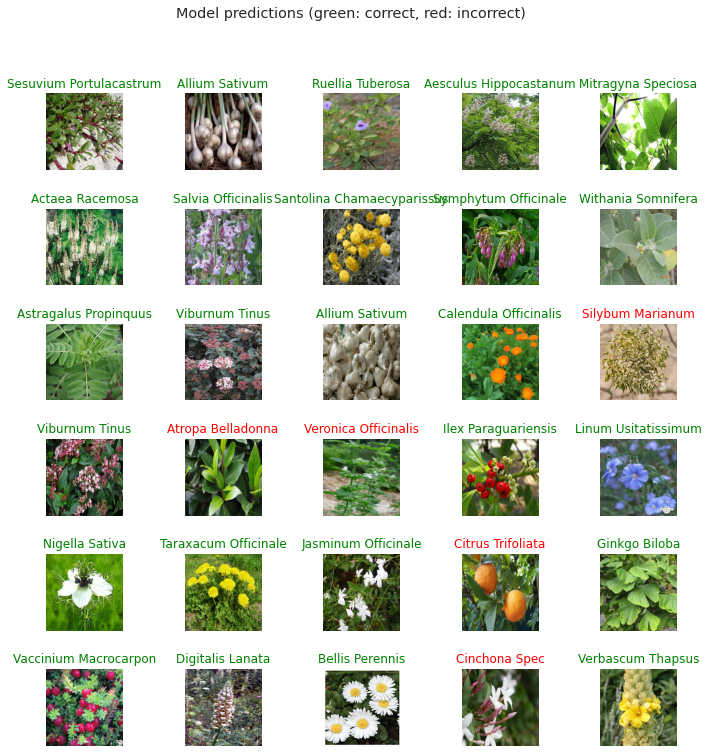

In [ ]:

plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(normalize):
  classes = labels  #dataset_labels
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(valid_generator, valid_generator,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

Confusion Matrix without Normalization


ValueError: ignored

In [ ]:
import seaborn as sns
predicted_metrics = model.evaluate(testX, testY,batch_size=BS, verbose=0)
for name, value in zip(model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print()

plot_cm(trueIdxs, predIdxs)
#plt.savefig('confusion_matrix.pdf', format='pdf')

NameError: ignored

### **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

NameError: ignored

# Save Model and Weights

In [ ]:

model.save('mobileNet_Medical.h5')
model.save_weights('mobileNet_weights_Medical.hdf5')

# Evaluating the performance of the model

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

11/11 [==============================] - 7s 612ms/step - loss: 1.2231 - acc: 0.7034
Final loss: 1.22
Final accuracy: 70.34%


# Load saved model

In [ ]:

from tensorflow.keras.models import Model, load_model
#model = load_model('mobileNet_Medical.h5')

In [ ]:
#score = model.evaluate(train_generator, valid_generator, verbose=1)
#print("The score loss of test model is %f" %(score[0]))
#print("The score accuracy of test model is %f" %(score[1]*100))

#train_datagen,valid_datagen

In [ ]:
y_pred = model.predict(valid_generator,  batch_size=100, verbose=1)
print("The accuracy of the predicted model using the deep learning multi class classification is %f" %(100-np.mean(np.abs(y_pred - valid_generator)))+'%')

11/11 [==============================] - 7s 560ms/step


# Predicted New Sample

In [ ]:
from tensorflow.keras import models
model = models.load_model('/content/drive/My Drive/cdac/model/mobileNet_weights_Medical.hdf5')

In [ ]:
import numpy as np
#from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('459c65dc55770af36beafe047849c190.jpg', target_size = (64, 64))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('459c65dc55770af36beafe047849c190.jpg')
print("This Image is of ..")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)

###############################
with open(results + '.txt','r') as file:
  print(file.read())
###############################

# cv2_imshow(imggg)
# print(results)
#if results[0][0] == 0:
#    prediction = 'Positive For Covid-19'
#else:
#    prediction = 'Negative for Covid-19'
    
    
#print("Prediction Of Our Model : ",prediction)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
imgpath='/content/content/459c65dc55770af36beafe047849c190.jpg'# set the image path
img = image.load_img(imgpath, target_size=(224, 224),color_mode = "grayscale")
img = image.img_to_array(img)
               
img = np.expand_dims(img, axis=0)         
#img /= 255.                                      

pred = model.predict(img)
index = np.argmax(pred)
class_list= labels  #dataset_labels
class_list.sort()

###############################
with open(class_list+ '.txt','r') as file:
  print(file.read())
###############################

pred_value = class_list[index]
print(pred_value)

In [ ]:
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import load_model
import matplotlib.pyplot as plt

#model=load_model("/content/drive/My Drive/covid19-dataset/covid191.h5")
_img=load_img("459c65dc55770af36beafe047849c190.jpg",target_size=(224,224))
img=img_to_array(_img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)
#plt.subplot(1,2,1)
plt.imshow(_img)
#plt.subplot(1,2,2)
#plt.imshow(img)
plt.show()
features=model.predict(img)

print('acc : =' ,acc )
print('Prediction : =' ,prediction )
print('Actual : =' ,prediction )
#for GradCAM
###############################
with open(features+ '.txt','r') as file:
  print(file.read())
###############################

class_idxs_sorted = np.argsort(features.flatten())[::-1]

In [ ]:
import cv2
import matplotlib.image as mpimg
img_src = '459c65dc55770af36beafe047849c190.jpg'
img = cv2.imread(img_src)
img_pred = load_img('459c65dc55770af36beafe047849c190.jpg', target_size = (224, 224))
img_pred = img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)
ind = train_image_gen.class_indices
#print(ind)


#train_image_gen.class_indices
classnumber=np.argmax(rslt[0])
classnames= rslt
prediction=classnames[np.argmax(rslt[0]*100)]
#prediction=('%.2f' % (probability[1]*100)
score=rslt[0][classnumber]


#if prediction[0]:
#    print("this is a Dog")
#if prediction[1]:
#    print("this is a Cat")




print( )
print( )
print( )
print( )
print( )
print("intensity = ",score)
target_width = 50
target_height = 50
target_size = (target_width, target_height)
img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)
fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)
np_img = mpimg.imread(img_src)
plt.imshow(np_img)
print('acc : =' ,acc )
print('Prediction : =' ,prediction )
print('Actual : =' ,prediction )
print( "Comment =" )